In [1]:
# from modules.chatbot import *
from modules.dataholder import *
from modules.preprocess import *
from modules.model import *
from modules.evaluate import *
import pandas as pd

In [2]:
# csv = './classification_test.csv'
# task_type = 0
# target = 'churn'

csv = './regression_test.csv'
task_type = 1
target = 'price'

dataholder = DataHolder()
dataholder.set_csv_path(csv)
prep = DataFramePreprocessor(dataholder)

Loading data at ./regression_test.csv
Normalizing column names
Converting column types
The current version cannot support date or time columns. These will be dropped automatically.


In [3]:
dataholder.get_dataframe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 30154 entries, 0 to 30154
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          30154 non-null  float64
 1   bedrooms       30154 non-null  int64  
 2   bathrooms      30154 non-null  float64
 3   sqft_living    30154 non-null  int64  
 4   sqft_lot       30154 non-null  int64  
 5   floors         30154 non-null  float64
 6   waterfront     30154 non-null  int64  
 7   greenbelt      30154 non-null  int64  
 8   nuisance       30154 non-null  object 
 9   view           30154 non-null  object 
 10  condition      30154 non-null  object 
 11  grade          30154 non-null  object 
 12  heat_source    30122 non-null  object 
 13  sewer_system   30140 non-null  object 
 14  sqft_above     30154 non-null  int64  
 15  sqft_basement  30154 non-null  int64  
 16  sqft_garage    30154 non-null  int64  
 17  sqft_patio     30154 non-null  int64  
 18  yr_built   

In [4]:
dataholder.set_machine_learning_task(task_type)
prep.split_features(target)

In [5]:
dataholder.X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30154 entries, 0 to 30154
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       30154 non-null  int64  
 1   bathrooms      30154 non-null  float64
 2   sqft_living    30154 non-null  int64  
 3   sqft_lot       30154 non-null  int64  
 4   floors         30154 non-null  float64
 5   waterfront     30154 non-null  int64  
 6   greenbelt      30154 non-null  int64  
 7   nuisance       30154 non-null  object 
 8   view           30154 non-null  object 
 9   condition      30154 non-null  object 
 10  grade          30154 non-null  object 
 11  heat_source    30122 non-null  object 
 12  sewer_system   30140 non-null  object 
 13  sqft_above     30154 non-null  int64  
 14  sqft_basement  30154 non-null  int64  
 15  sqft_garage    30154 non-null  int64  
 16  sqft_patio     30154 non-null  int64  
 17  yr_built       30154 non-null  int64  
 18  yr_renovate

In [6]:
dataholder.y

0         675000.0
1         920000.0
2         311000.0
3         775000.0
4         592500.0
           ...    
30150    1555000.0
30151    1313000.0
30152     800000.0
30153     775000.0
30154     500000.0
Name: price, Length: 30154, dtype: float64

In [7]:
prep.train_test_split()

In [8]:
prep.clean_data(strictness = 2)

In [9]:
prep.standardize_and_encode()

In [10]:
X_train, X_test, y_train, y_test = dataholder.get_train_test()

In [11]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built
9993,4,3.5,4290,55742,2.0,1,0,YES,EXCELLENT,Good,11 Excellent,Gas,PUBLIC,2970,1480,750,1315,1978
24178,5,3.5,3530,5279,2.0,0,0,NO,NONE,Average,8 Good,Gas,PUBLIC,2550,980,420,280,2022
25576,3,1.0,1040,7287,1.0,0,0,NO,NONE,Very Good,7 Average,Electricity,PUBLIC,1040,0,300,0,1959
11295,3,2.0,1750,19465,1.0,0,0,NO,NONE,Good,7 Average,Gas,PRIVATE,1750,0,510,170,1974
10284,3,2.0,2810,84955,1.0,0,0,NO,NONE,Good,8 Good,Electricity,PRIVATE,1890,1140,800,590,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2276,3,2.0,1530,7178,2.0,0,0,YES,NONE,Good,7 Average,Gas,PUBLIC,1530,0,460,170,1978
29416,3,1.0,1170,5200,1.0,0,0,NO,NONE,Very Good,6 Low Average,Gas,PUBLIC,1170,0,0,56,1919
231,3,2.0,1490,8987,1.0,0,0,NO,NONE,Average,7 Average,Gas,PUBLIC,1170,580,440,0,1969
10806,5,3.5,3380,8400,3.0,0,0,YES,NONE,Average,10 Very Good,Gas,PUBLIC,3380,0,490,660,2017


In [12]:
y_train

9993     2400000.0
24178     986000.0
25576     742115.0
11295     505000.0
10284     725000.0
           ...    
2276     1050000.0
29416     485000.0
231      1200000.0
10806    3000000.0
9441     1800000.0
Name: price, Length: 23631, dtype: float64

In [13]:
encoders = dataholder.get_data_encoders()
encoders

{'preprocessor': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe', OneHotEncoder(drop='first'),
                                  ['waterfront', 'greenbelt', 'heat_source',
                                   'condition', 'view', 'nuisance', 'grade',
                                   'sewer_system']),
                                 ('ssc', StandardScaler(),
                                  ['bedrooms', 'bathrooms', 'sqft_living',
                                   'sqft_lot', 'floors', 'sqft_above',
                                   'sqft_basement', 'sqft_garage', 'sqft_patio',
                                   'yr_built'])])}

In [14]:
dataholder.set_modeling_parameters(
    hyperparameter_tuning = False,
    extended_models = True,
    cv = 5,
    random_state = 42
)

modeler = AutomaticModeler(dataholder = dataholder)

In [15]:
modeler.fit_and_score_model()

/home/josh/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.200e+15, tolerance: 1.817e+12
  model = cd_fast.enet_coordinate_descent(


In [16]:
best_model = dataholder.get_best_model()
predictions = dataholder.get_predictions()
scores = dataholder.get_scores()

In [17]:
evaluator = ModelEvaluator(dataholder = dataholder)

**Rating: 7.5 / 10**

The purpose of this model is to predict the price of a house based on various features such as the number of bedrooms, bathrooms, square footage, and more.

**Hypothesis Testing (f-stat: 313.19, f-p-value: 0.00):**
The model's F-statistic is 313.19, and the F-p-value is 0.00, which is extremely low. This indicates that the model is highly significant and that the independent variables are good predictors of the dependent variable.

**Model Fit (train R^2: 0.53, train RSME: 598969.48, test R^2: 0.56, test RSME: 524837.70):**
The model's R^2 score is 0.53 for the training data and 0.56 for the testing data, which means that the model explains about 53-56% of the variance in the target variable. The Root Mean Squared Error (RMSE) is 598969.48 for the training data and 524837.70 for the testing data. This indicates that the model is slightly overfitting, as the train RMSE is lower than the test RMSE. R^2 measures the proportion of the variance in the target variable that is explained by the independent variables, while RMSE measures the average difference between the predicted and actual values.

**Top 5 Most Significant Features:**
1. **grade_12 Luxury (p-value: 0.00, coefficient: 1.164844e+06):** This feature indicates that houses with a grade of 12 Luxury have a significantly higher price.
2. **waterfront_1 (p-value: 0.00, coefficient: 9.047421e+05):** This feature indicates that houses with a waterfront have a significantly higher price.
3. **view_EXCELLENT (p-value: 0.00, coefficient: 5.972460e+05):** This feature indicates that houses with an excellent view have a significantly higher price.
4. **sewer_system_PUBLIC (p-value: 0.00, coefficient: 1.981320e+05):** This feature indicates that houses with a public sewer system have a significantly higher price.
5. **grade_11 Excellent (p-value: 0.00, coefficient: 6.912736e+05):** This feature indicates that houses with a grade of 11 Excellent have a significantly higher price.

**Model Evaluation:**
The model is slightly overfitting, as the train R^2 is higher than the test R^2 and the train RMSE is lower than the test RMSE. This could be due to the model being too complex and fitting the noise in the training data. To improve the model, we could try to simplify the model by reducing the number of features or using regularization techniques.

**Suggestions for Model Improvement:**
1. Try to simplify the model by reducing the number of features.
2. Use regularization techniques to reduce overfitting.
3. Collect more data to improve the model's accuracy.
4. Try different modeling techniques, such as decision trees or random forests, to see if they perform better.

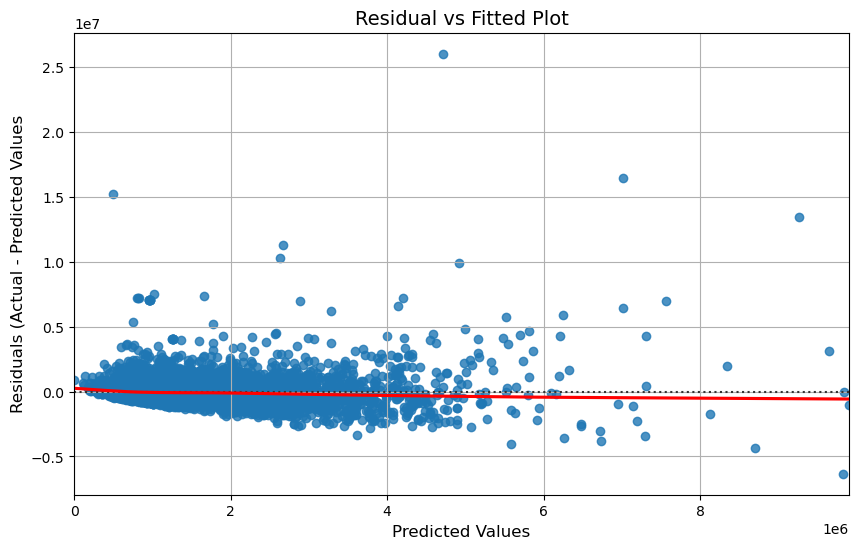

The residual plot shows the difference between the actual values and the predicted values of a model. In this case, the model is trying to predict the price of something.

The plot shows the residuals, which are the differences between the actual prices and the predicted prices. For example, the first residual is 9993, which means that the actual price was 9993 more than the predicted price.

The residuals are shown in the units of the original data, which is the price. The values range from a negative 2.5 million to a positive 8.8 million.

I would rate the contents of this residual plot a 7 out of 10. The plot shows a wide range of residuals, which suggests that the model is not doing a great job of predicting the prices. Some of the residuals are very large, which could indicate that the model is not capturing some important factors that affect the prices. However, the plot does not show any obvious patterns or outliers, which is a good sign.

In [18]:
evaluator.evaluate_regression_model()

In [19]:
# df = pd.read_csv('./test.csv')
# df.columns

In [20]:
# df.PaymentMethod.value_counts()